In [1]:
import pandas as pd
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt

current = os.path.dirname(os.path.abspath(''))
parent = os.path.dirname(current)
sys.path.append(parent)

import normalCowboy as nc

In [2]:
otu_tableA = pd.read_csv("otutab_SetA.csv",index_col = 0)
otu_tableB = pd.read_csv("otutab_SetB.csv",index_col = 0)

In [3]:
otu_tableA

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S140,S141,S142,S143,S144,S145,S146,S147,S148,S149
A_0,52,24,0,48,2,56,1,118,1,2,...,1,20,8,0,6,1,0,8,0,0
A_1,23,36,22,14,4,13,11,12,2,19,...,22,11,13,1,3,6,7,10,31,12
A_2,81,81,16,26,6,114,63,17,7,16,...,117,61,156,18,46,90,35,47,104,8
A_3,15,56,46,382,15,97,545,724,81,26,...,42,1076,1108,225,14,36,32,29,180,110
A_4,406,26,181,44,197,161,4,50,83,396,...,4,73,2,100,12,10,20,4,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A_329,636,36,135,20,193,26,83,110,260,54,...,73,64,75,81,75,241,105,25,2093,298
A_330,47,145,57,358,1223,113,410,77,940,2107,...,65,37,17,12,6,5,426,30,43,302
A_331,123,6,12,5,40,13,14,8,52,0,...,5,579,462,4,4,368,1,65,4,11
A_332,725,123,432,80,55,89,1624,504,804,2641,...,287,2863,99,458,70,278,120,226,1150,134


In [4]:
otu_tableB

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S140,S141,S142,S143,S144,S145,S146,S147,S148,S149
B_334,19,5,373,9,16,11,4,800,98,191,...,470,35,11,25,34,30,2,12,106,119
B_335,165,118,162,136,157,92,126,163,61,366,...,262,323,320,242,184,275,230,89,357,245
B_336,468,291,209,92,102,48,470,253,20,237,...,81,79,227,186,577,607,95,73,457,155
B_337,13,14,34,5,14,30,3,7,7,114,...,58,11,1,45,18,48,162,3,69,17
B_338,64,349,13,10,22,19,11,89,12,54,...,166,36,78,292,28,87,52,6,19,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_495,1,8,21,194,222,48,70,509,0,446,...,6,156,2,135,146,46,0,5,7,109
B_496,48,498,195,9,62,2,66,2,66,35,...,45,40,1,118,57,33,116,6,11,75
B_497,350,472,56,35,54,73,35,305,11,46,...,77,45,315,191,478,270,32,12,319,177
B_498,207,150,448,94,65,30,790,257,54,90,...,336,79,129,481,163,180,1506,459,65,631


In [5]:
otu_tables = {"A":otu_tableA, "B":otu_tableB}
lam = 0.03
normtype = "dirichlet"
name = "example"
table_type = "counts"
return_precision = False

    :param otu_tables: set of otu tables (if multiple data types) or single table. (read counts or relative abundance)
    :type otu_tables: dict(pd.DataFrame) or pd.DataFrame

    :param lam: LASSO penalty. Default 0.03
    :type lam: float

    :param normtype: type of table normalization. Options - dirichlet/add_pseudocounts/robust. Default "dirichlet"
    :type normtype: str

    :param chunkyness: Size of sub-blocks to fit. 0 for regular GLASSO. Default 0
    :type chunkyness: int

    :param name: name to use for temp files passed to julia. Default "glasso"
    :type name: str

    :param table_type: type of OTU table(s) provided. Options counts/relative. Default "counts"
    :type table_type: str

    :param return_precision:  Whether to return the precision matrix instead of the covariance matrix. Default False
    :type return_precision: bool


In [6]:
%%time
glasso_fit = nc.glasso(otu_tables,lam=lam,normtype=normtype,name=name,table_type=table_type,return_precision=return_precision)

[glasso] Computing GLASSO Fit using NormalCowboy with 500 total taxa
CPU times: user 155 ms, sys: 87.1 ms, total: 242 ms
Wall time: 22min 37s


<AxesSubplot:>

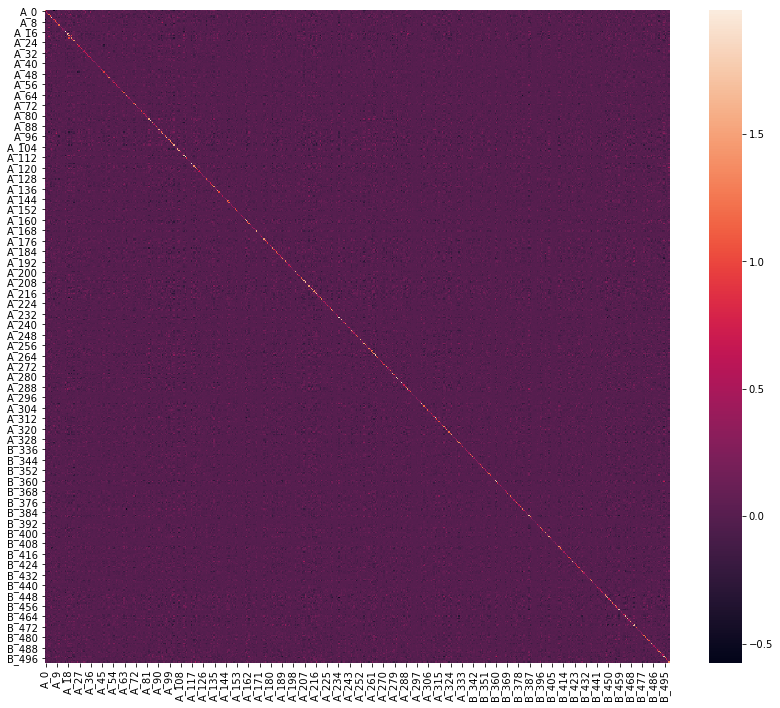

In [7]:
fig,ax = plt.subplots(figsize = (14,12))
sb.heatmap(glasso_fit,ax = ax)

In [8]:
%%time
glasso_fit_chunky = nc.glasso(otu_tables,lam=lam,normtype=normtype,name=name,table_type=table_type,return_precision=return_precision,chunkyness=10)

[glasso] Computing GLASSO Fit using NormalCowboy with 500 total taxa
CPU times: user 129 ms, sys: 116 ms, total: 245 ms
Wall time: 5min 48s


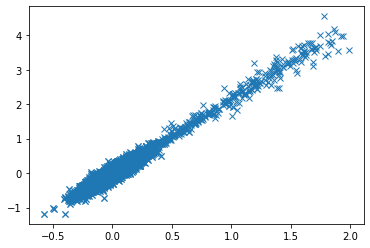

In [9]:
plt.plot(glasso_fit.values.flatten(),glasso_fit_chunky.values.flatten(),'x')

<AxesSubplot:>

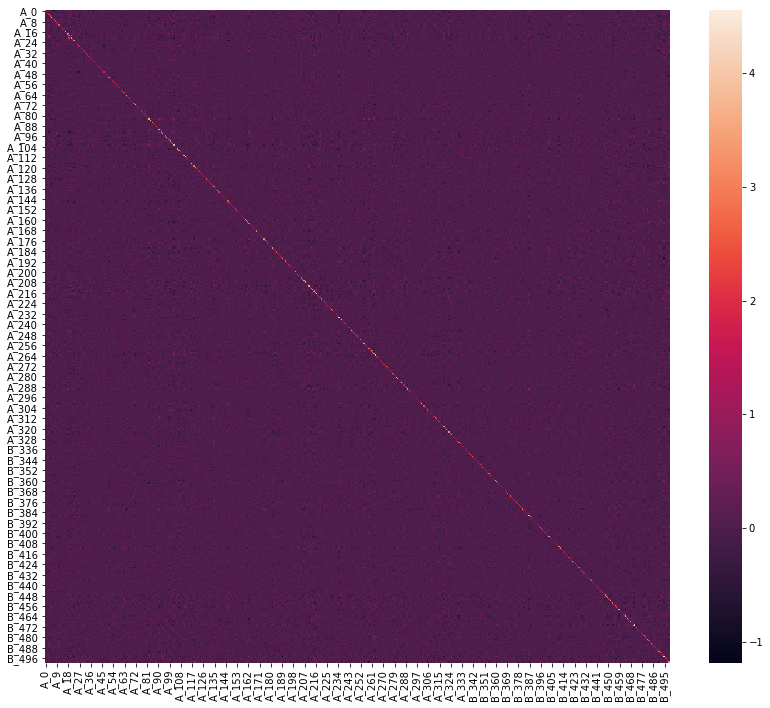

In [10]:
fig,ax = plt.subplots(figsize = (14,12))
sb.heatmap(glasso_fit_chunky,ax = ax)

In [11]:
from scipy import stats

In [12]:
res = stats.linregress(glasso_fit.values.flatten(),glasso_fit_chunky.values.flatten())

In [16]:
res

LinregressResult(slope=2.021140222386733, intercept=-0.00011621105750954158, rvalue=0.9562291484245273, pvalue=0.0, stderr=0.001236996755986786, intercept_stderr=8.177512082291241e-05)

In [15]:
res.rvalue**2

0.9143741842966967